In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Normalization**

In [3]:
# We normalize the dataset between 0 and 1 by dividing the image pixels by 255.

X_train = X_train / 255.0
X_test  = X_test  / 255.0

## **MODEL**

### **a) Creating a Model**

In [4]:

# Softmax Activation Function: It will return the probability of each class to us.(10 classes.)

model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),      # Flatten() => It is a flattening layer. It converts each image into a one-dimensional vector.
    layers.Dense(128, activation='relu'),     # Using the Relu Activation Function, we make negative inputs 0; we can use positive inputs as is.
    layers.Dense(10, activation = 'softmax')  # Since we have 10 classes, we say we want to get 10 output.

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **b) Model Compilation**

In [5]:

# Since we want to classify 10 different types of clothes and we want to see the labels in integer format from 0-9,
# we use the 'sparse_categorical_cross_entropy' loss function.

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])


### **c) Model Training**

In [6]:
history =  model.fit(X_train, y_train, epochs=5, batch_size=32,  validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7790 - loss: 0.6376 - val_accuracy: 0.8384 - val_loss: 0.4463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8626 - loss: 0.3813 - val_accuracy: 0.8635 - val_loss: 0.3788
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8738 - loss: 0.3428 - val_accuracy: 0.8677 - val_loss: 0.3759
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8860 - loss: 0.3123 - val_accuracy: 0.8703 - val_loss: 0.3621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8909 - loss: 0.2967 - val_accuracy: 0.8713 - val_loss: 0.3515


## **Model Evaluation & Visualization**

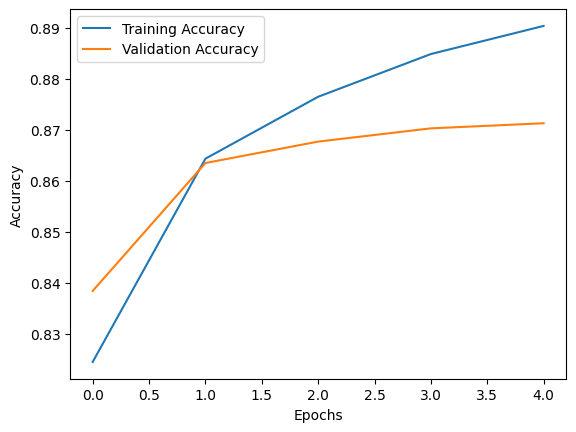

In [7]:
# Visualization

plt.plot(history.history['accuracy'], label='Training Accuracy')

# val-acc grafiği
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**COMMENTS:**

* **Accuracy**: It expresses training accuracy. It shows the success of the model on the training data.

* **Validation_Accuracy:** It expresses validation accuracy. It shows the success of the model on the test set.

* If the accuracy score increases while your validation score decreases, we can say that this is a sign of overfitting.

* If the validation accuracy increases as the training accuracy (val_accuracy) increases, then the model is performing well on both training and test data.

* Here, we can talk about overfitting since the training accuracy increases while the verification accuracy remains constant after a certain point.

